In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Attribute profiles (APs)

![](img/aps.png)

## 0. Setup: Load the DSM tile and compute the max-tree

- Load the dsm tile `tile_path`.
- Compute the max-tree.

In [2]:
tile_path = Path('data/dsm_vox_50cm_tile_-12_0.tif')
dsm = rio.open(tile_path).read(1)
max_tree = sap.MaxTree(dsm)

## 1. Create the (max) attribute profiles of the DSM 

Compute the attribute profiles of the DSM with the max-tree *only* (normally it's min and max tree).

- Choose an attribute (e.g. `area`)
- Set several thresholds (e.g. `[1000, 10000, 100000]`)
- Filter the tree according to these thresholds, stack the filtered images!
- Display the profiles (as in the intro image)

### Area attribute

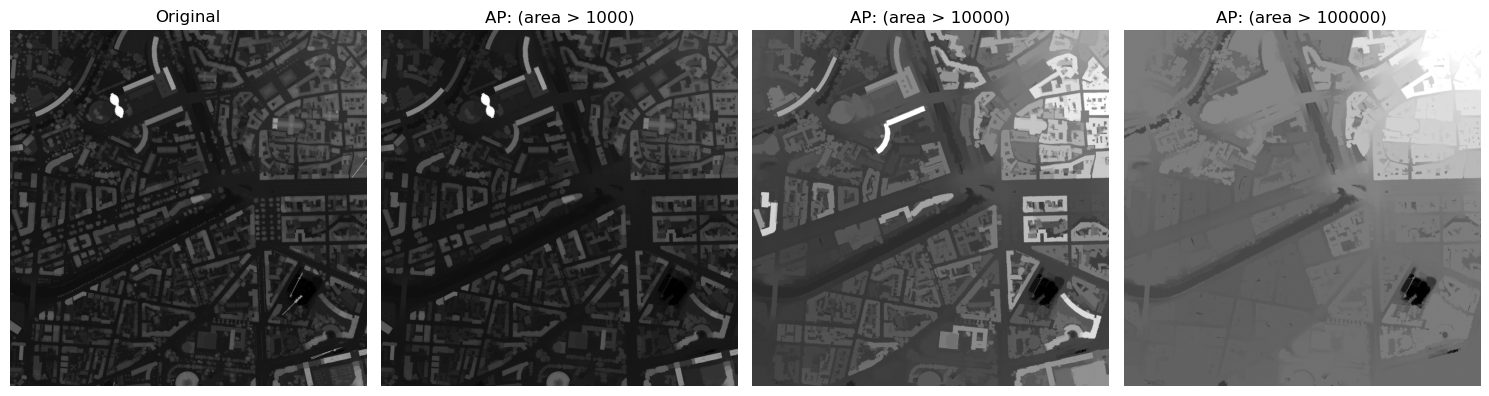

In [3]:
# attributes
area = max_tree.get_attribute('area')

# set of thresholds
area_thresh = [1000, 10000, 100000]

# filter tree according to threshold
profiles = []  # empty list to store the profiles

for th in area_thresh:
    # nodes to delete: small nodes
    deleted_nodes = area < th
    # reconstruct filtered DSM
    filtered = max_tree.reconstruct(deleted_nodes)
    
    profiles.append(filtered)

# add original dsm to the profiles
attribute_profile = [dsm] + profiles


# display profiles for attribute area
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(attribute_profile[0], cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(attribute_profile[1], cmap='gray')
plt.title(f"AP: (area > {area_thresh[0]})")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(attribute_profile[2], cmap='gray')
plt.title(f"AP: (area > {area_thresh[1]})")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(attribute_profile[3], cmap='gray')
plt.title(f"AP: (area > {area_thresh[2]})")
plt.axis("off")

plt.tight_layout()
plt.show()


### compactness attribute

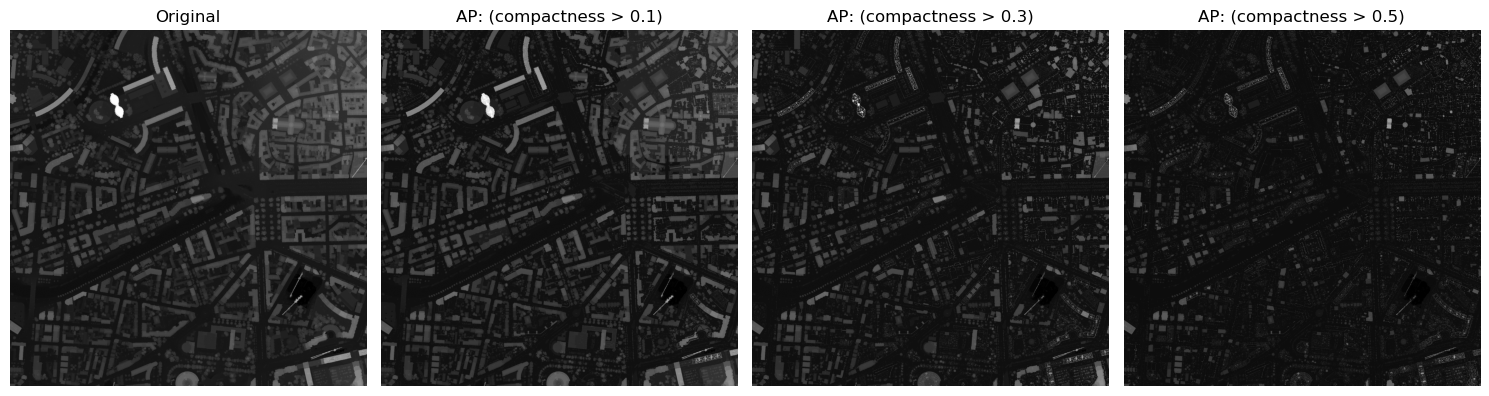

In [4]:
# attributes
compactness = max_tree.get_attribute('compactness')

# set of thresholds
compactness_thresh = [0.1, 0.3, 0.5]

# filter tree according to threshold
profiles2 = []  # empty list to store the profiles

for th in compactness_thresh:
    # nodes to delete: small nodes
    deleted_nodes = compactness < th
    # reconstruct filtered DSM
    filtered = max_tree.reconstruct(deleted_nodes)
    
    profiles2.append(filtered)

# add original dsm to the profiles
attribute_profile2 = [dsm] + profiles2 


# display profiles for attribute area
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(attribute_profile2[0], cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(attribute_profile2[1], cmap='gray')
plt.title(f"AP: (compactness > {compactness_thresh[0]})")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(attribute_profile2[2], cmap='gray')
plt.title(f"AP: (compactness > {compactness_thresh[1]})")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(attribute_profile2[3], cmap='gray')
plt.title(f"AP: (compactness > {compactness_thresh[2]})")
plt.axis("off")

plt.tight_layout()
plt.show()


# 2. Compute the Differential APs

The differential APs allows to see the structures removed at each thresholds.

- Compute the image differences from you attribute profiles stack
- Display!

### Area attribute

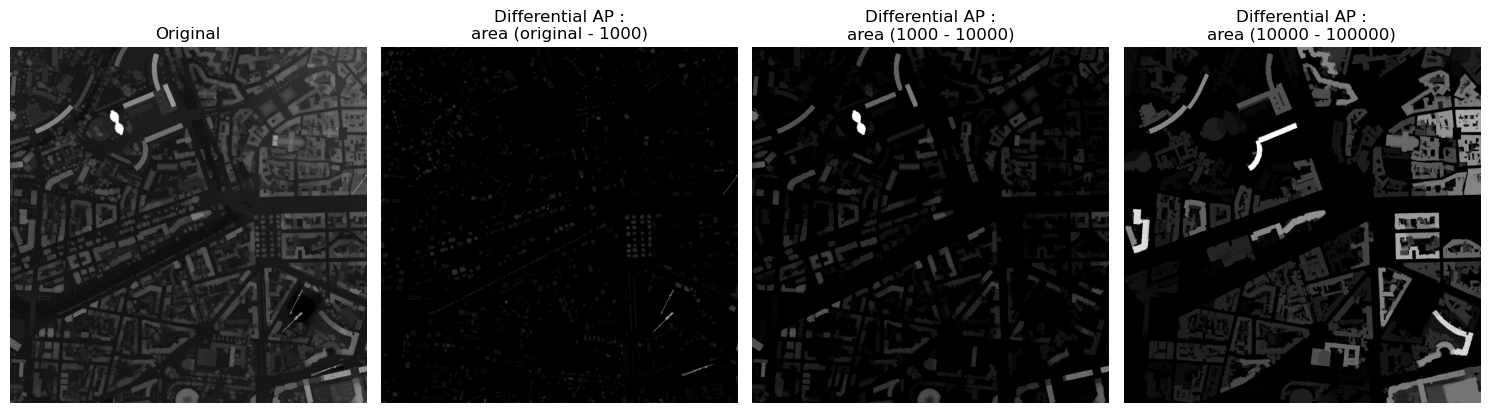

In [5]:
# differential APs
diff_profiles = []

# compute difference image sequentially after each filtering
for i in range(1, len(attribute_profile)):
    diff = attribute_profile[i-1] - attribute_profile[i]  
    diff_profiles.append(diff)

# add the original image
diff_profiles = [dsm] + diff_profiles   

# display differential profiles
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(diff_profiles[0], cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(diff_profiles[1], cmap='gray')
plt.title(f"Differential AP :\narea (original - {area_thresh[0]})")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(diff_profiles[2], cmap='gray')
plt.title(f"Differential AP :\narea ({area_thresh[0]} - {area_thresh[1]})")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(diff_profiles[3], cmap='gray')
plt.title(f"Differential AP :\narea ({area_thresh[1]} - {area_thresh[2]})")
plt.axis("off")

plt.tight_layout()
plt.show()

### Compactness attribute

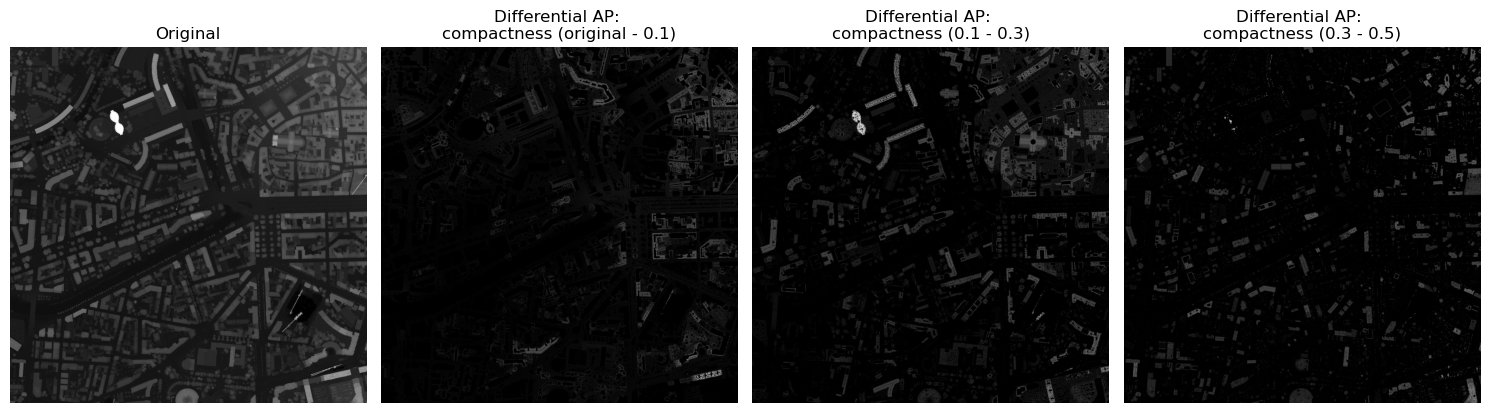

In [6]:
# differential APs
diff_profiles2 = []

# compute difference image sequentially after each filtering
for i in range(1, len(attribute_profile2)):
    diff = attribute_profile2[i-1] - attribute_profile2[i]  
    diff_profiles2.append(diff)

diff_profiles2 = [dsm] + diff_profiles2  # add the original image to see the difference

# display differential profiles
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(diff_profiles2[0], cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(diff_profiles2[1], cmap='gray')
plt.title(f"Differential AP: \ncompactness (original - {compactness_thresh[0]})")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(diff_profiles2[2], cmap='gray')
plt.title(f"Differential AP: \ncompactness ({compactness_thresh[0]} - {compactness_thresh[1]})")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(diff_profiles2[3], cmap='gray')
plt.title(f"Differential AP: \ncompactness ({compactness_thresh[1]} - {compactness_thresh[2]})")
plt.axis("off")

plt.tight_layout()
plt.show()

## 3. Compute and display complete APs (min and max), Differential APs and Self-dual Attribute Profiles

In [7]:
# Don't panic, we'll use SAP!

# complete Attribute profiles
ap = sap.profiles.create_profiles((sap.MinTree(dsm), sap.MaxTree(dsm)), {'area': [1000, 10000, 100000]}, profiles_name='attribute profiles')
print(ap)

Total:   0%|          | 0/7 [00:00<?, ?it/s]

area:   0%|          | 0/7 [00:00<?, ?it/s]

Profiles{'attribute': 'area',
 'filtering rule': 'direct',
 'name': 'attribute profiles',
 'out feature': 'altitude',
 'profiles': [{'operation': 'thinning', 'threshold': 100000},
              {'operation': 'thinning', 'threshold': 10000},
              {'operation': 'thinning', 'threshold': 1000},
              {'operation': 'copy feature altitude'},
              {'operation': 'thickening', 'threshold': 1000},
              {'operation': 'thickening', 'threshold': 10000},
              {'operation': 'thickening', 'threshold': 100000}],
 'tree': {'adjacency': 4, 'image_hash': 'f0eb33b2', 'image_name': None}}


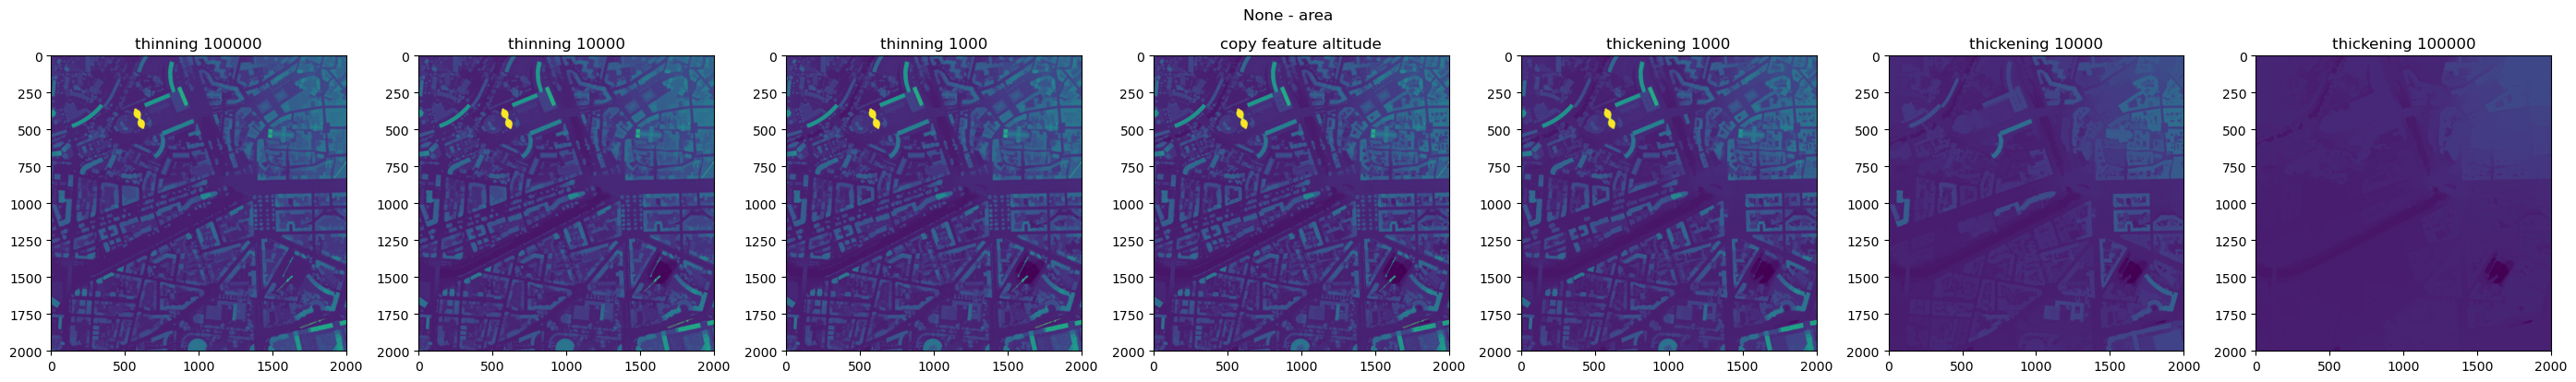

In [8]:
# visualize attribute profiles
sap.profiles.show_profiles(ap, height = 4)

In [9]:
# differential APs
dap = sap.profiles.differential(ap)
print(dap)

Profiles{'attribute': 'area',
 'filtering rule': 'direct',
 'name': 'attribute profiles',
 'out feature': 'altitude',
 'profiles': [{'operation': 'differential',
               'profiles': [{'operation': 'thinning', 'threshold': 100000},
                            {'operation': 'thinning', 'threshold': 10000}]},
              {'operation': 'differential',
               'profiles': [{'operation': 'thinning', 'threshold': 10000},
                            {'operation': 'thinning', 'threshold': 1000}]},
              {'operation': 'differential',
               'profiles': [{'operation': 'thinning', 'threshold': 1000},
                            {'operation': 'copy feature altitude'}]},
              {'operation': 'differential',
               'profiles': [{'operation': 'copy feature altitude'},
                            {'operation': 'thickening', 'threshold': 1000}]},
              {'operation': 'differential',
               'profiles': [{'operation': 'thickening', 'threshold':

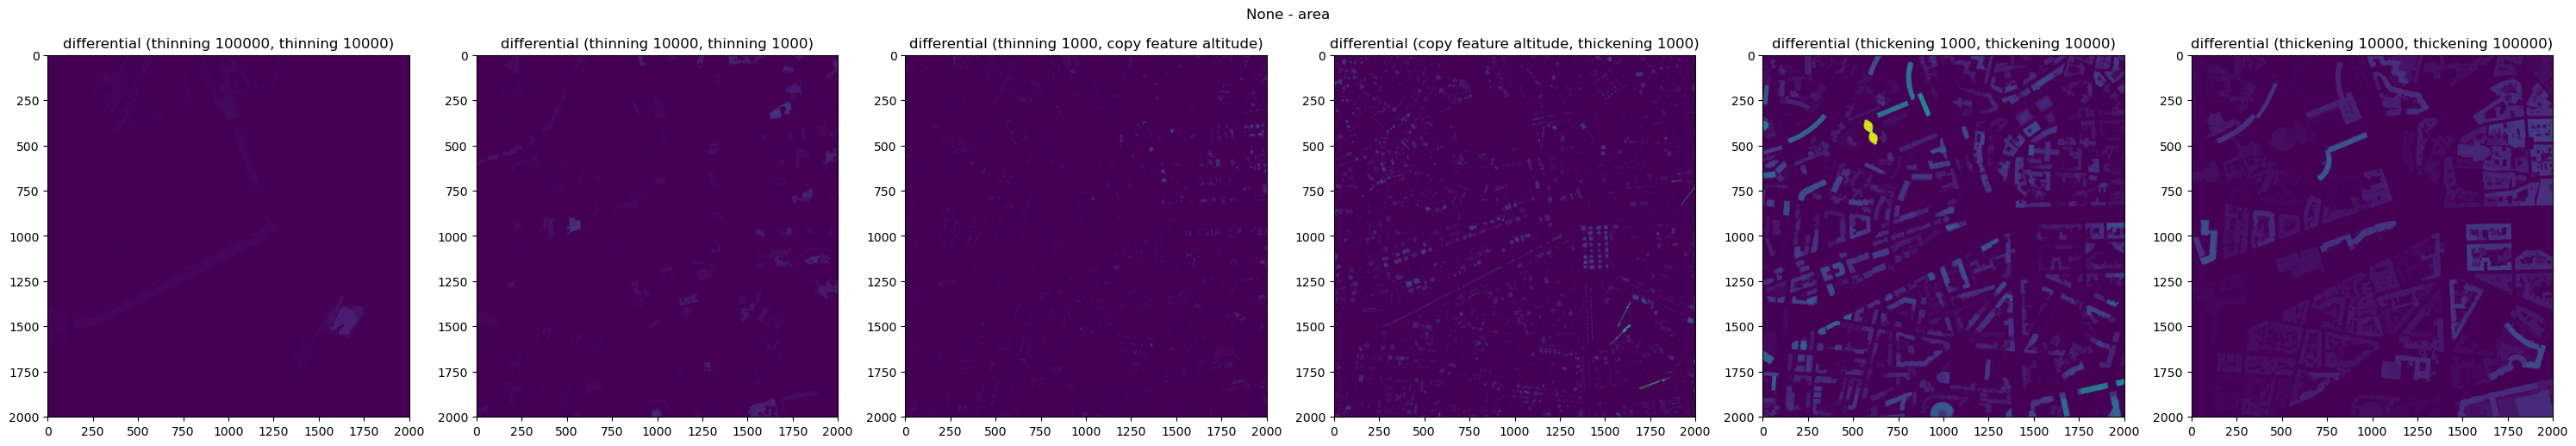

In [13]:
# visualize differential attribute profiles
sap.profiles.show_profiles(dap, height = 5)

In [11]:
# self dual APs
sdap = sap.profiles.self_dual_attribute_profiles(dsm, {'area': [1000, 10000, 100000]}, adjacency=4, image_name=None, filtering_rule='direct')
print(sdap)

Total:   0%|          | 0/4 [00:00<?, ?it/s]

area:   0%|          | 0/4 [00:00<?, ?it/s]

Profiles{'attribute': 'area',
 'filtering rule': 'direct',
 'name': 'self dual attribute profiles',
 'out feature': 'altitude',
 'profiles': [{'operation': 'copy feature altitude'},
              {'operation': 'sd filtering', 'threshold': 1000},
              {'operation': 'sd filtering', 'threshold': 10000},
              {'operation': 'sd filtering', 'threshold': 100000}],
 'tree': {'adjacency': 4, 'image_hash': 'f0eb33b2', 'image_name': None}}


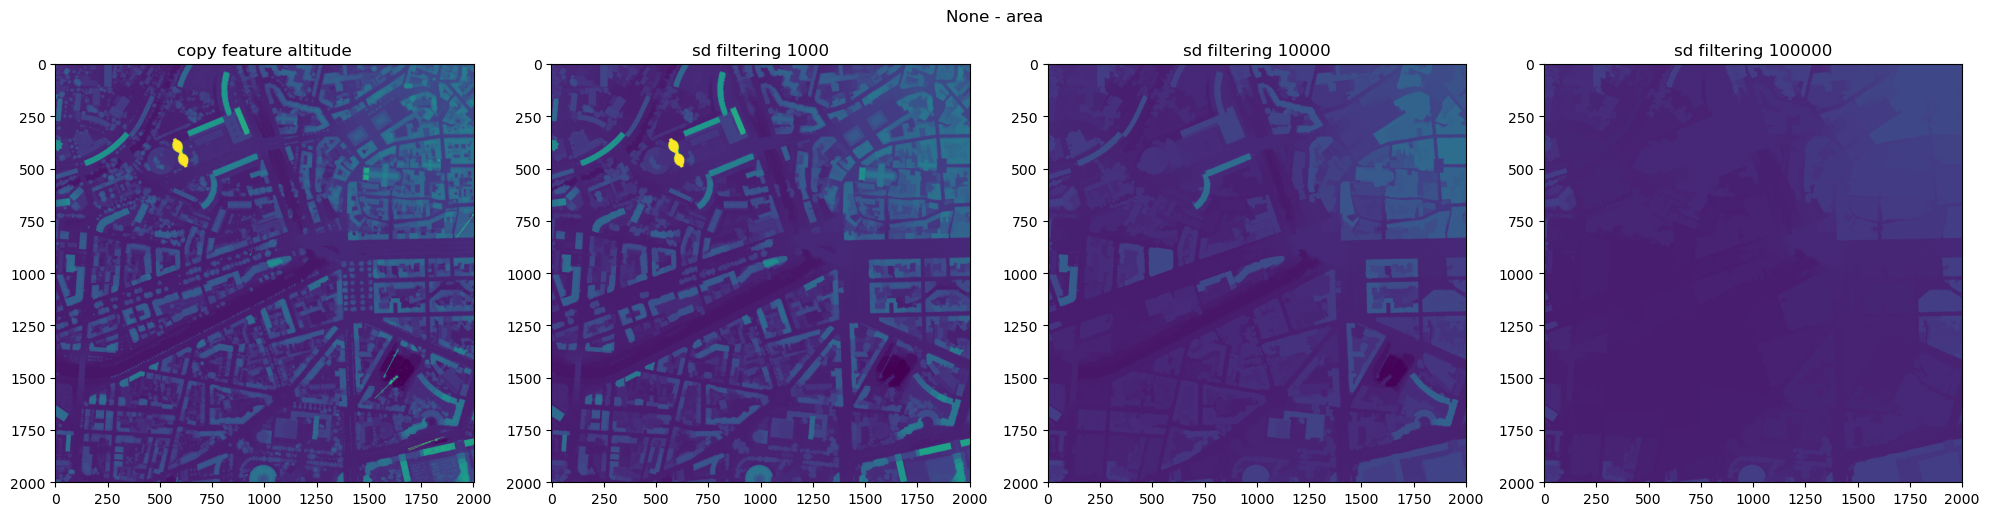

In [12]:
# visualize self dual attribute profiles
sap.profiles.show_profiles(sdap, height = 5)